# PyTorch for classification

As we all know a classification problem is one where we should predict some kind of class or label (dog/cat, what types of food ...)


## 1. Make Classifiction data (Toy Dataset)

In [35]:
import sklearn

In [36]:
from sklearn.datasets import make_circles

# MAke 100 samples
n_samples = 1000

#Create Circle
X, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)

In [37]:
len(X), len(y)

(1000, 1000)

In [38]:
X[:5], y[:5]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556]]),
 array([1, 1, 1, 1, 0]))

In [39]:
# Make Data fram
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "labels":  y})
circles.head(10)

,X1,X2,labels
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


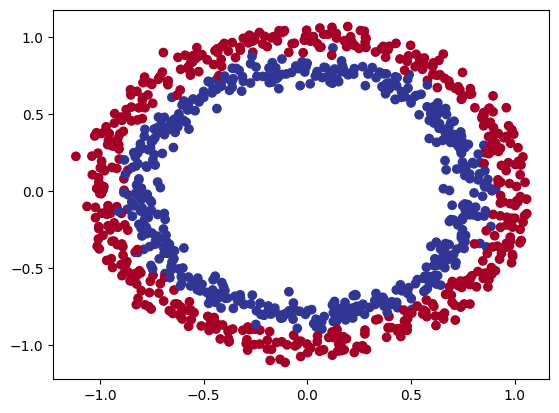

In [40]:
# Visualize with matplotlib
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [41]:
X.shape, y.shape

((1000, 2), (1000,))

In [42]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values of one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values of one sample of X: [0.74220688 0.24668576] and the same for y: 1
Shapes of one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and split them (train/test)

In [43]:
import torch
torch.__version__

'2.2.2+cu118'

In [44]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [45]:
# split data into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our data.

Setup:
1. Device agnostic code so the code runs on GPU
2. Construct model (inherit from `nn.Module`)
3. Define a loss function and optimizer
4. Create a traininh and test loop

In [47]:
# import PyTorch and nn
import torch
from torch import nn

# MAke device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

MOODEEEEELLLL CREAAATIOOOONNN:

1. inherit from `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass of the model

In [48]:
class CircleModelV0(nn.Module): # 1. Inherit from nn.Module
    def __init__(self):
        super().__init__()
        # 2. Create to Linear Layers
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5) # 2 to 5
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1) # 5 from layer 1 to 1
    # 3. define forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#4. instantiate an istance of model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [49]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4807, -0.5128],
                      [-0.3775,  0.6475],
                      [-0.2386, -0.2507],
                      [-0.6842, -0.4049],
                      [ 0.1766, -0.0933]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5133,  0.0166, -0.4830, -0.5999, -0.3894], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.3914, -0.2848,  0.4470,  0.0845,  0.1378]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.4171], device='cuda:0'))])

In [50]:
# Replicating Model using nn.Sequencial()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [51]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4644, -0.2354],
                      [ 0.1106, -0.6222],
                      [-0.3047, -0.4233],
                      [ 0.0020, -0.2631],
                      [-0.0490, -0.4792]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4854, -0.4125, -0.2420, -0.5581,  0.5929], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0888,  0.3848,  0.1393, -0.3787,  0.3095]], device='cuda:0')),
             ('1.bias', tensor([-0.1230], device='cuda:0'))])

In [52]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Prediction length: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Test sample length: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 prediction: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")


Prediction length: 200, Shape: torch.Size([200, 1])
Test sample length: 200, Shape: torch.Size([200, 2])
First 10 prediction: tensor([[-0.1065],
        [-0.1808],
        [ 0.2040],
        [-0.2043],
        [ 0.3896],
        [ 0.3383],
        [-0.0309],
        [ 0.0856],
        [ 0.2167],
        [-0.1888]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

For classification problems we mostly use cross entropy as loss function, so that's what we'll be using `nn.BCEWithLogitsLoss()`.

As for optimizers, the most common are SGD and Adam.

In [53]:
# Setup Loss function
# loss_fn = nn.BCELoss() # require the input to go through sigmoid function before giving them to it 
loss_fn = nn.BCEWithLogitsLoss() # Has sigmoid activation function builtin

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [54]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

Training loops steps:

1. Forward pass
2. Calculate the loss
3. optimize the zero grad
4. Loss backward (backprop)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Model outputs are raw **logits**.

We can convert them into **prediction probabilities** by passing them into an **activation funtion**. (e.g. sigmoid, softmax, ReLU ...)

THen we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [55]:
# View the first 5 outmputs of the forward pass
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1065],
        [-0.1808],
        [ 0.2040],
        [-0.2043],
        [ 0.3896]], device='cuda:0')

In [56]:
# USe sigmoid on logits to turn them into prediction probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4734],
        [0.4549],
        [0.5508],
        [0.4491],
        [0.5962]], device='cuda:0')

In [57]:
# Find the predicted labels 
y_preds = torch.round(y_pred_prob)

# All in one
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


### 3.2 Building a training and testing loops

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

epoch_vals = []
loss_vals = []
test_loss_vals = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train,
                      y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test,
                      test_pred)
        
    if epoch % 100 == 0:
        epoch_vals.append(epoch)
        test_loss_vals.append(test_loss)
        loss_vals.append(loss)
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f} | Accuracy: {acc:.2f} | Test accuracy: {test_acc:.2f}")
        # print(model_0.state_dict())

Epoch: 0 | Loss: 0.7024 | Test loss: 0.6929 | Accuracy: 51.00 | Test accuracy: 53.50
Epoch: 100 | Loss: 0.6939 | Test loss: 0.6924 | Accuracy: 49.88 | Test accuracy: 50.50
Epoch: 200 | Loss: 0.6931 | Test loss: 0.6938 | Accuracy: 51.00 | Test accuracy: 49.00
Epoch: 300 | Loss: 0.6930 | Test loss: 0.6944 | Accuracy: 51.12 | Test accuracy: 46.50
Epoch: 400 | Loss: 0.6930 | Test loss: 0.6946 | Accuracy: 51.25 | Test accuracy: 47.00
Epoch: 500 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.38 | Test accuracy: 45.50
Epoch: 600 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.00 | Test accuracy: 45.50
Epoch: 700 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.38 | Test accuracy: 46.50
Epoch: 800 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.25 | Test accuracy: 46.00
Epoch: 900 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.25 | Test accuracy: 46.00
Epoch: 1000 | Loss: 0.6930 | Test loss: 0.6947 | Accuracy: 51.25 | Test accuracy: 45.50
Epoch: 1100 | Loss: 0.6930 | Test loss: 0.69

## 4. Make prediction and evaluate the model

From the metrics it looks like the model isn't learning anything.

So to inspect further let's vizualize some predictions.

To do so, we shoud import a function called `plot_decision_boundary()`

In [59]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
    print("already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

already exists


In [60]:
from helper_functions import plot_predictions, plot_decision_boundary

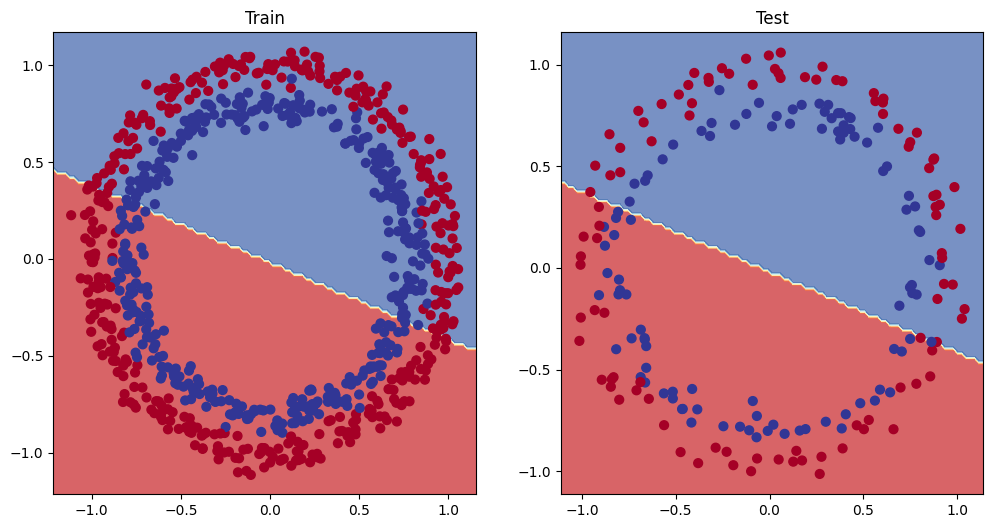

In [61]:
# Plot decision boudaries

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving the model

- Add More layers
- Add more hidden units
- Fit for longer (increase epochs)
- Changing the activation functions
- Change the learning rate
- Change the loss function

These options are all from a model's perspective, if the model is sound we might want to check the data.

In [160]:
# Try Larger model
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=32),
    nn.ReLU(), # introducing ReLU for non linearity
    nn.Linear(in_features=32, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=1, bias=True)
)

In [161]:
# Change optimizer?
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [162]:
# Train new model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

epoch_vals = []
loss_vals = []
test_loss_vals = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train,
                      y_preds)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_1.eval()
    
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test,
                      test_preds)
    if epoch % 100 == 0:
        epoch_vals.append(epoch)
        test_loss_vals.append(test_loss)
        loss_vals.append(loss)
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f} | Accuracy: {acc:.2f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.6892 | Test loss: 0.6892 | Accuracy: 50.00 | Test accuracy: 50.00
Epoch: 100 | Loss: 0.6756 | Test loss: 0.6801 | Accuracy: 70.00 | Test accuracy: 64.50
Epoch: 200 | Loss: 0.6612 | Test loss: 0.6683 | Accuracy: 77.25 | Test accuracy: 75.00
Epoch: 300 | Loss: 0.6447 | Test loss: 0.6539 | Accuracy: 85.75 | Test accuracy: 80.50
Epoch: 400 | Loss: 0.6255 | Test loss: 0.6373 | Accuracy: 92.62 | Test accuracy: 88.50
Epoch: 500 | Loss: 0.6032 | Test loss: 0.6184 | Accuracy: 94.88 | Test accuracy: 90.50
Epoch: 600 | Loss: 0.5781 | Test loss: 0.5976 | Accuracy: 95.75 | Test accuracy: 93.50
Epoch: 700 | Loss: 0.5499 | Test loss: 0.5748 | Accuracy: 96.62 | Test accuracy: 93.00
Epoch: 800 | Loss: 0.5193 | Test loss: 0.5501 | Accuracy: 96.50 | Test accuracy: 94.50
Epoch: 900 | Loss: 0.4870 | Test loss: 0.5240 | Accuracy: 97.00 | Test accuracy: 94.00


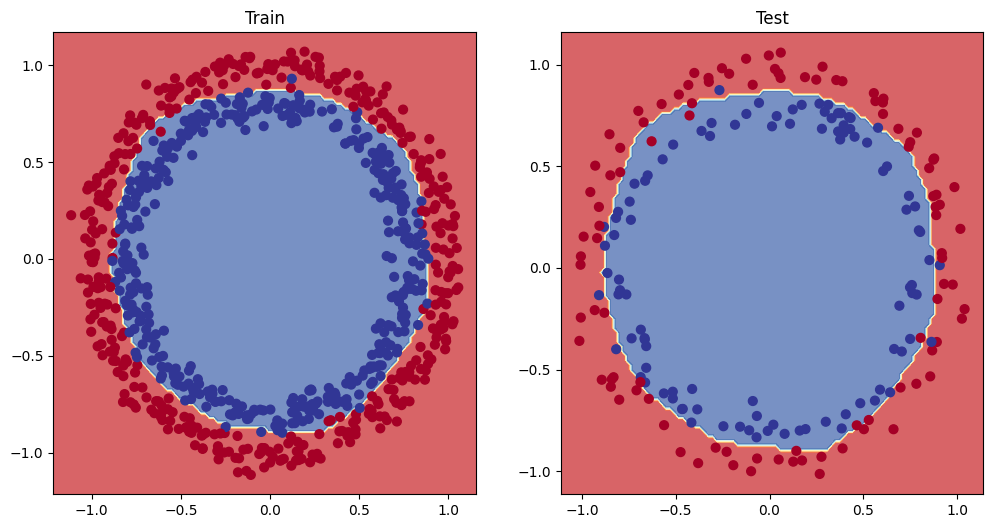

In [163]:
# Plot decision boudaries

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

#### Why did this model work where the first one failed? (hint: ***NON LINEARITY***)
The introduction of ReLU activation function allowed us to transform the linear output of the first layer to non linear values.


## 6. Replicating non-linear activation functions

Rather than us telling the model to learn, we give it the tools to discover patterns in data and it figures them out on its own.

In [166]:
# Create a tensor
A = torch.arange(-10, 10, 1.)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

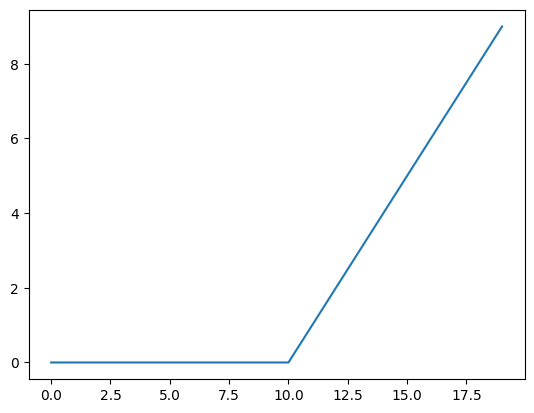

In [168]:
plt.plot(torch.relu(A))

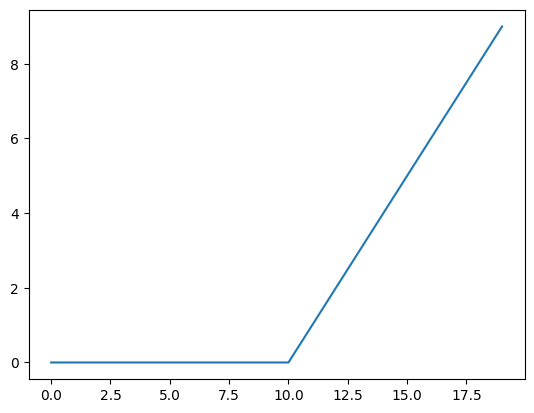

In [171]:
def relu(x):
    return torch.max(torch.tensor(0), x)
plt.plot(relu(A))

In [172]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

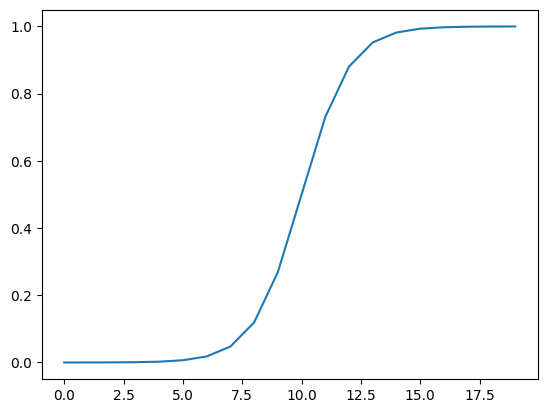

In [174]:
plt.plot(sigmoid(A));

## 7. Multiclass Classification

Multiclass classification is when we classify our data to more than two labels.

### 7.1 Creating a toy multiclass dataset

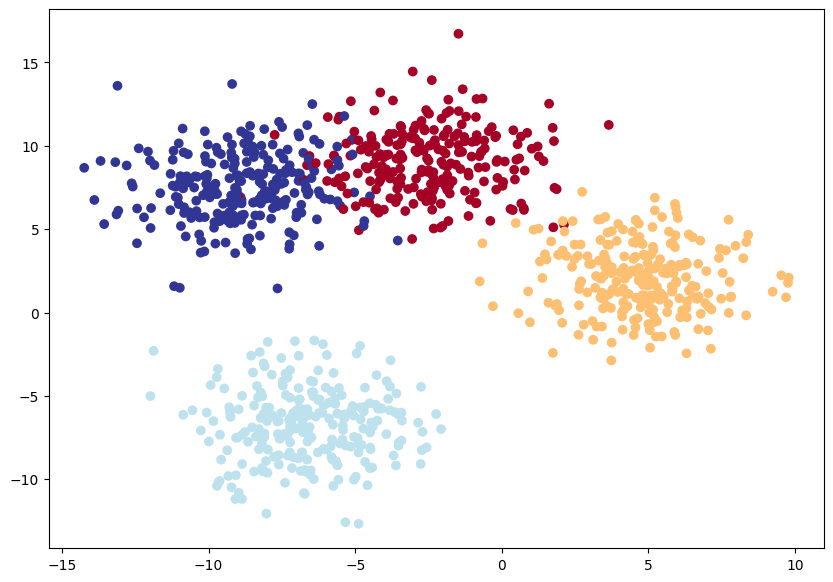

In [184]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparams for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create data
X_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=2,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


### 7.2 Building a MultiClass classification model in PyTorch

In [185]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [254]:
# Build multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, input_feats, output_feats, hidden_units=8):
        """
        Initializes multi-class classification model.
        
        Args:
            input_feats(int): 
            output_feats(int): 
            hidden_units(int): Number of hidden units between layers
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feats, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_feats)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_2 = BlobModel(2, 4).to(device)
model_2

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 7.3 Create a loss function and an optimizer for the model

In [255]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

### 7.4 Getting prediction probabilities for a multiclass PyTorch model

In [256]:
# Move Data to GPU
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [257]:
# Check the raw outputs of the model (logits)
model_2.eval()
with torch.inference_mode():
    y_logits = model_2(X_test)
y_logits[:10], y_test[:10]

(tensor([[-1.3110, -0.9241, -1.5577, -0.5291],
         [ 1.6571, -1.2051,  1.6741,  2.0371],
         [ 2.2116,  0.8168,  2.5772,  0.9540],
         [-0.7035, -0.3389, -0.8034, -0.4880],
         [-0.6527, -1.6576, -0.9377,  0.5456],
         [ 2.1518, -1.3994,  2.1914,  2.5760],
         [ 1.6663,  0.9684,  1.9978,  0.4072],
         [ 0.1132, -1.4742, -0.0669,  1.0150],
         [ 3.1485,  0.7278,  3.5972,  1.7643],
         [-0.1611, -1.5094, -0.3744,  0.8239]], device='cuda:0'),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.], device='cuda:0'))

In [258]:
# Convert out model's logit output to predictionb probabilities
y_pred_prob = torch.softmax(y_logits, 1)
print(y_logits[:5])
print(y_pred_prob[:5])

tensor([[-1.3110, -0.9241, -1.5577, -0.5291],
        [ 1.6571, -1.2051,  1.6741,  2.0371],
        [ 2.2116,  0.8168,  2.5772,  0.9540],
        [-0.7035, -0.3389, -0.8034, -0.4880],
        [-0.6527, -1.6576, -0.9377,  0.5456]], device='cuda:0')
tensor([[0.1838, 0.2707, 0.1437, 0.4018],
        [0.2828, 0.0162, 0.2876, 0.4135],
        [0.3363, 0.0834, 0.4847, 0.0956],
        [0.2181, 0.3140, 0.1973, 0.2705],
        [0.1841, 0.0674, 0.1384, 0.6101]], device='cuda:0')


In [259]:
#Convert model prediction proba to prediction label
y_preds = torch.argmax(y_pred_prob, 1)
y_preds, y_test

(tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
         2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
         3, 3, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
         2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
         2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
         2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
         1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0'),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
         3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
         1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
         3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 

### 7.5 Create a training and testing loop for this model

In [260]:
epochs = 1000

torch.manual_seed(42)
torch.cuda.manual_seed(42)

timeline = []
test_losses = []
losses = []

for epoch in range(epochs):
    model_2.train()
    
    y_logits = model_2(X_train)
    y_pred_prob = torch.softmax(y_logits, 1)
    y_preds = torch.argmax(y_pred_prob, 1).type(torch.float32)
    loss = loss_fn(y_logits, y_train.long())
    acc = accuracy_fn(y_train,
                      y_preds)
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_2.eval()
    
    with torch.inference_mode():
        test_logits = model_2(X_test)
        test_pred_proba = torch.softmax(test_logits, 1)
        test_preds = torch.argmax(test_pred_proba, 1).type(torch.float32)
        test_loss = loss_fn(test_logits, y_test.long())
        test_acc = accuracy_fn(y_test,
                      test_preds)
    
    if epoch % 100 == 0:
        timeline.append(epoch)
        test_losses.append(test_loss)
        losses.append(loss)
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f} | Accuracy: {acc:.2f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 1.0519 | Test loss: 0.9721 | Accuracy: 63.00 | Test accuracy: 68.00
Epoch: 100 | Loss: 0.2020 | Test loss: 0.1944 | Accuracy: 96.38 | Test accuracy: 96.50
Epoch: 200 | Loss: 0.1398 | Test loss: 0.1288 | Accuracy: 96.38 | Test accuracy: 96.50
Epoch: 300 | Loss: 0.1193 | Test loss: 0.1066 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 400 | Loss: 0.1098 | Test loss: 0.0963 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 500 | Loss: 0.1046 | Test loss: 0.0906 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 600 | Loss: 0.1014 | Test loss: 0.0871 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 700 | Loss: 0.0992 | Test loss: 0.0847 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 800 | Loss: 0.0976 | Test loss: 0.0831 | Accuracy: 96.25 | Test accuracy: 96.50
Epoch: 900 | Loss: 0.0965 | Test loss: 0.0819 | Accuracy: 96.25 | Test accuracy: 96.50


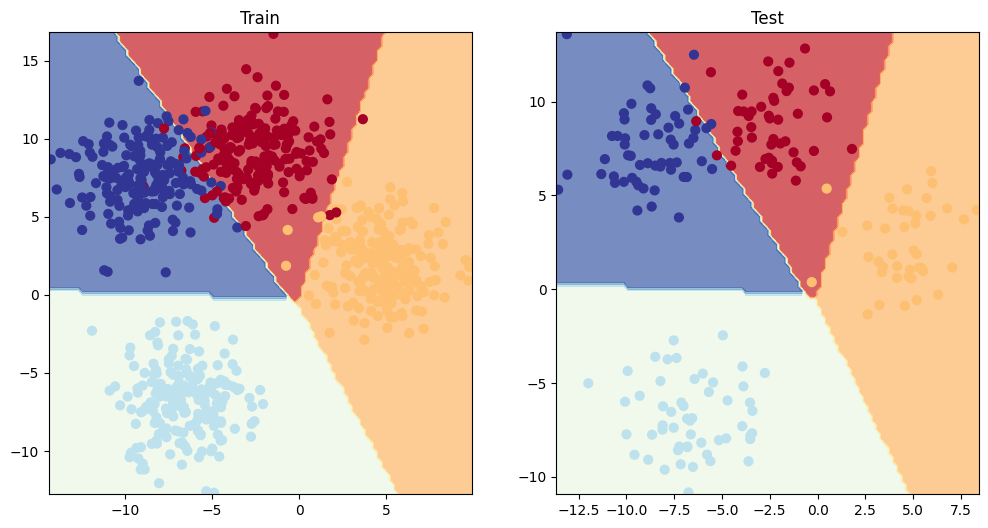

In [261]:
# Plot decision boudaries

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## 8. Few more classification metrics

- Accuracy - out of 100 sample how many are right.
- Precision - increase if you want less false positives
- Recall - increase if you want less false negatives
- F1-score - combines if you want a balance of precision and recall
- Confusion matrix
- Classification report

In [262]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [269]:
from torchmetrics import Accuracy

# Setup metric
accur = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)

# Calculate acuract
accur(test_preds, y_test)

tensor(0.9650, device='cuda:0')